<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

 <center><h1> K-Nearest Neighbors classification </h1></center>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
import utils

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Loading data

In [14]:
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

# Classification with learning on CI02

In [15]:
data = CI02

### Spliting dataset to train/test

In [16]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 

y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply KNN classifier

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

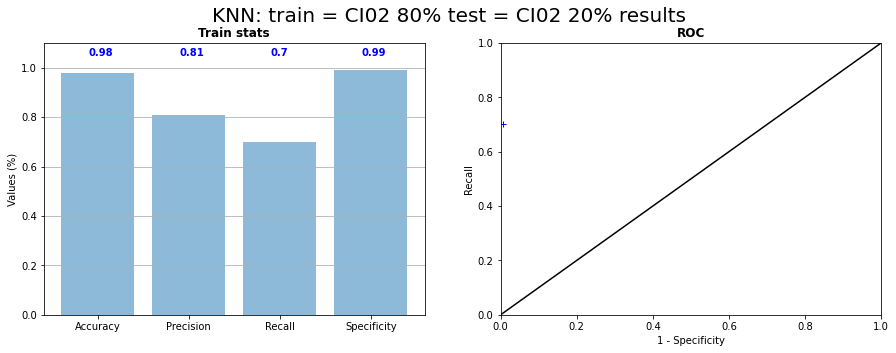

In [19]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN: train = CI02 80% test = CI02 20%")

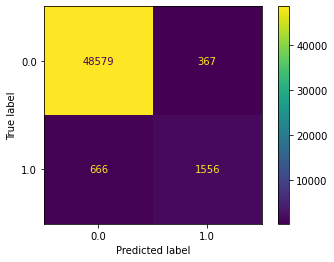

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 
plt.show()

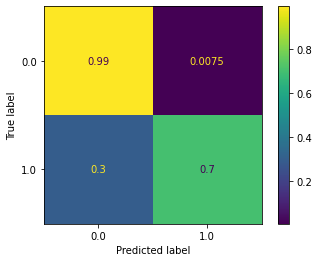

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

### Projection of test set

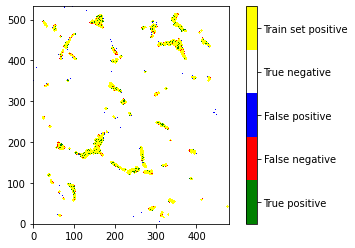

In [22]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

## Predict on CI02

In [23]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [24]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [25]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

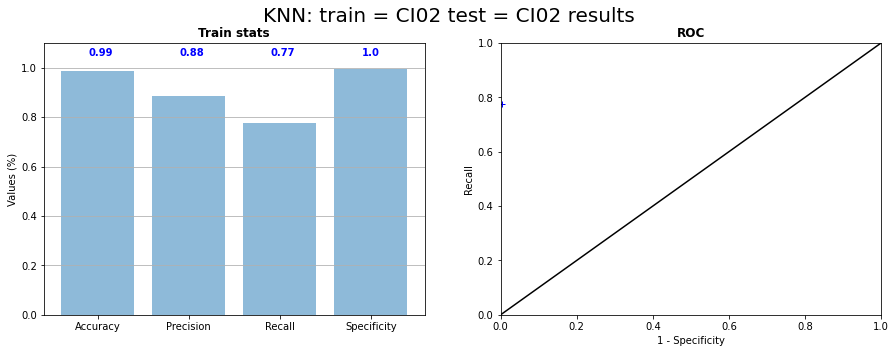

In [26]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN: train = CI02 test = CI02")

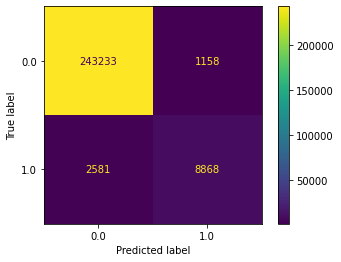

In [27]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

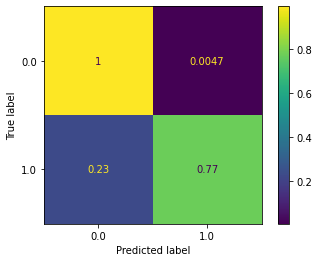

In [28]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of train/test set

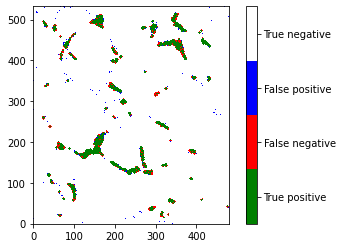

In [29]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on CI04

In [30]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI04['Y'] 

In [31]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [32]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

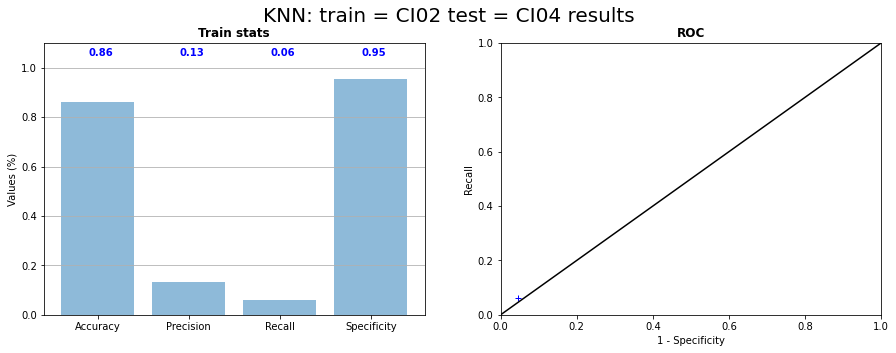

In [33]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN: train = CI02 test = CI04")

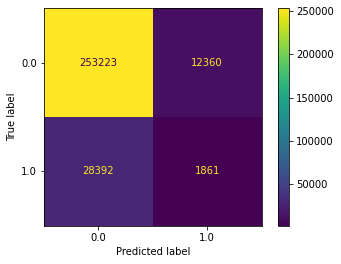

In [34]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

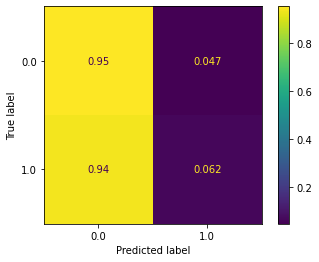

In [35]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of validation set

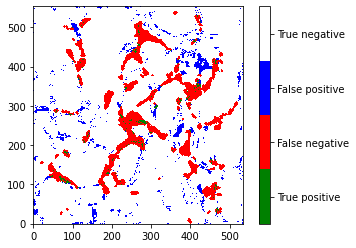

In [36]:
im_shape = np.shape(np.load("../data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

------------------------------------------------------------------

# Classification with learning on sub dataset of CI02 
Selection determinated by :

&emsp; $2 \times dist2GB + dist2TJ < 60$

### Selection of sub data

In [37]:
sub_data = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

### Splitting sub data

In [38]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply KNN Classifier

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

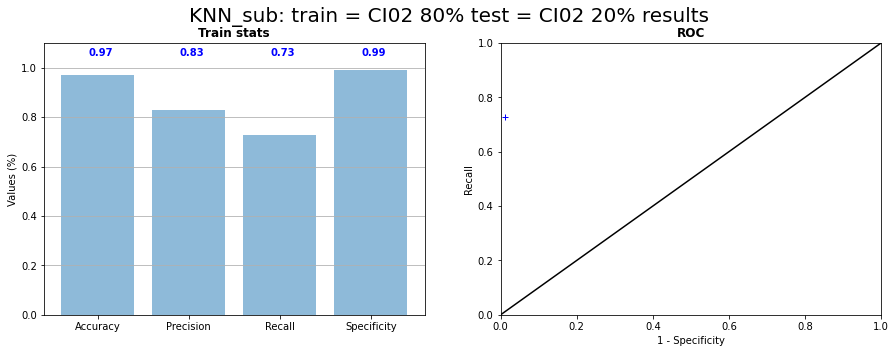

In [41]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN_sub: train = CI02 80% test = CI02 20%")

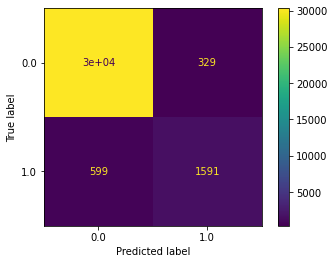

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

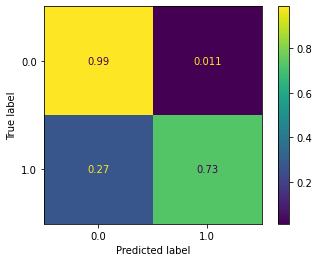

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true')  
plt.show()

## Prediction on CI02

In [44]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [45]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [46]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

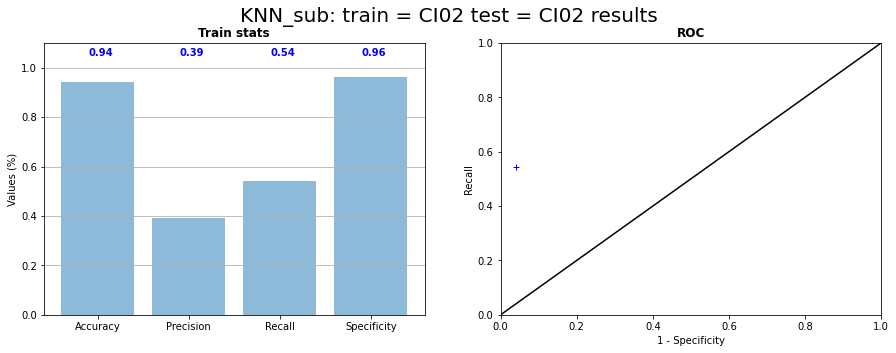

In [47]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN_sub: train = CI02 test = CI02")

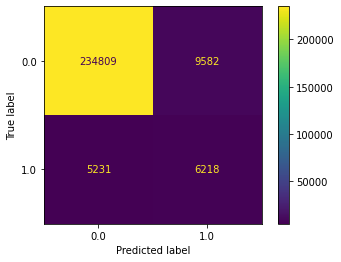

In [48]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

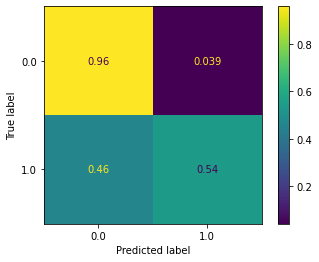

In [49]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize='true')  
plt.show()

### Projection of train/test set

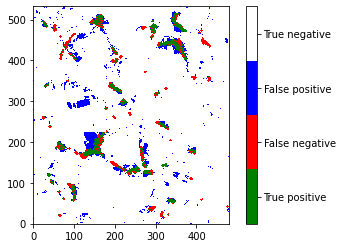

In [50]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Prediction on CI04

In [51]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI04['Y'] 

In [52]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [53]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

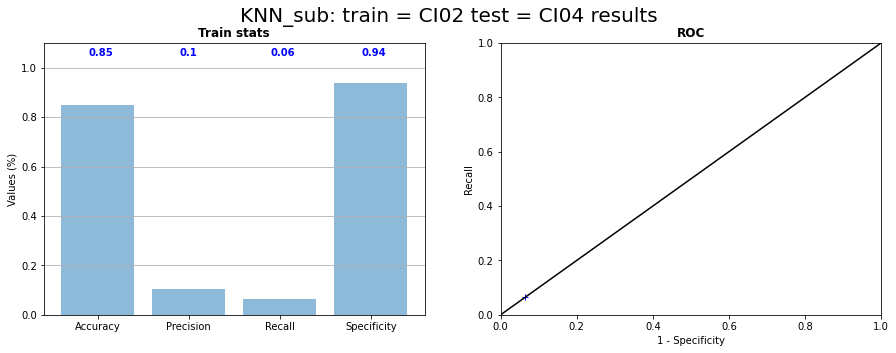

In [54]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="KNN_sub: train = CI02 test = CI04")

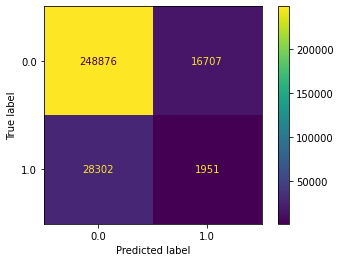

In [55]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

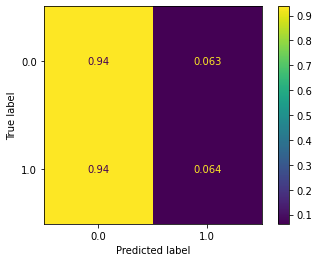

In [56]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize='true')  
plt.show()

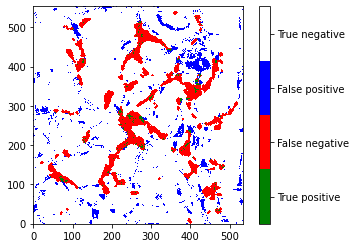

In [57]:
im_shape = np.shape(np.load("../data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)